### Impoting the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Importing the dataset

In [2]:
df = pd.read_csv('Expander_data.csv')

In [3]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


(296450, 9)

### Fitting the data into independent variable

In [5]:
X = df[['Suction Pressure (psig)', 'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)']].values

In [6]:
X

array([[5.96100853e+02, 7.92580049e+03, 2.99941104e+03, 6.00000000e+00],
       [5.96838217e+02, 8.08591772e+03, 2.98970662e+03, 6.00000000e+00],
       [5.96468895e+02, 7.90217524e+03, 3.00633168e+03, 6.00000000e+00],
       ...,
       [6.04480493e+02, 7.94499310e+03, 2.99962111e+03, 6.00000000e+00],
       [6.05071293e+02, 8.10765175e+03, 3.00899363e+03, 6.00000000e+00],
       [5.95669526e+02, 8.15162143e+03, 3.00642554e+03, 6.00000000e+00]])

### Fitting the data into dependent variable

In [7]:
y = df['Discharge Pressure (psig)'].values

In [8]:
y

array([226.0449315, 217.1509736, 226.0540858, ..., 231.3367608,
       220.6756921, 207.9314276])

In [9]:
print(X.shape)
print(y.shape)

(296450, 4)
(296450,)


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)

In [11]:
print(X_train.size)
print(y_train.size)

790532
197633


In [12]:
print(X_test.size)
print(y_test.size)

395268
98817


### Fitting Multiple Linear Regression to the Training set 

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = lin_reg.predict(X_test)

### Predicting the Test set result

In [15]:
y_pred = lin_reg.predict(X_test)
print(y_pred)

[140.51281695 149.5663402  133.47515137 ... 185.87861281 307.25029576
 230.35153082]


In [16]:
# print result of MAE
print(f"Mean Absolute Error (MAE) : {metrics.mean_absolute_error(y_test, y_pred)}")

# Print result of MSE

print(f"mean squared error : {metrics.mean_squared_error(y_test, y_pred)}")

# print rsult of RMSE

print(f"Root Mean Squared error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean Absolute Error (MAE) : 2.0001115898920245
mean squared error : 6.947610446812906
Root Mean Squared error : 2.635832021736762


### Fitting Polynomial Regression to the dataset

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2  = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
print(y_pred)

[139.87012583 148.50841751 134.22409871 ... 187.82081645 305.9405017
 230.66171862]


In [19]:
# print result of MAE
print(f"Mean Absolute Error (MAE) : {metrics.mean_absolute_error(y_test,lin_reg_2.predict(poly_reg.fit_transform(X_test)))}")

# Print result of MSE

print(f"mean squared error : {metrics.mean_squared_error(y_test, lin_reg_2.predict(poly_reg.fit_transform(X_test)))}")

# print rsult of RMSE

print(f"Root Mean Squared error : {np.sqrt(metrics.mean_squared_error(y_test, lin_reg_2.predict(poly_reg.fit_transform(X_test))))}")

Mean Absolute Error (MAE) : 1.034394810234168
mean squared error : 1.5524323902847807
Root Mean Squared error : 1.2459664482981798


### Fitting Decision Tree Regression to the dataset 

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)

### Predicting the test result

In [21]:
y_pred_1 = regressor.predict(X_test)
print(y_pred)

[139.87012583 148.50841751 134.22409871 ... 187.82081645 305.9405017
 230.66171862]


In [22]:
# print result of MAE
print(f"Mean Absolute Error (MAE) : {metrics.mean_absolute_error(y_test, y_pred_1)}")

# Print result of MSE

print(f"mean squared error : {metrics.mean_squared_error(y_test, y_pred_1)}")

# print rsult of RMSE

print(f"Root Mean Squared error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred_1))}")

Mean Absolute Error (MAE) : 1.4348651694855137
mean squared error : 3.381622237468699
Root Mean Squared error : 1.8389187685889496


### Fitting Random Forest Regression to the dataset

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 4, random_state = 0).fit(X_train, y_train)

### Predicting the test result

In [24]:
y_pred_2 = regressor.predict(X_test)
print(y_pred_2)

[140.04897073 148.42672633 134.43526637 ... 188.39188497 306.01851565
 231.39280172]


In [25]:
# print result of MAE
print(f"Mean Absolute Error (MAE) : {metrics.mean_absolute_error(y_test, y_pred_2)}")

# Print result of MSE

print(f"mean squared error : {metrics.mean_squared_error(y_test, y_pred_2)}")

# print rsult of RMSE

print(f"Root Mean Squared error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))}")

Mean Absolute Error (MAE) : 1.1846285520373043
mean squared error : 2.2490703531203073
Root Mean Squared error : 1.4996900856911428


D:\anaconda\anaconda 3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


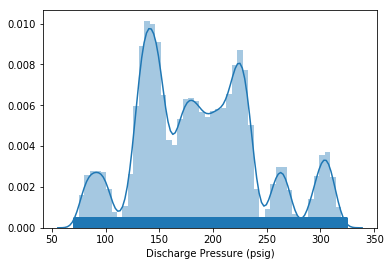

In [26]:
sns.distplot(df["Discharge Pressure (psig)"], rug = True)

### Discharge Pressure is highest at around 140 point.

# Conclusion

## The best fitting for this dataset is Polynomial Linear Regression with RMSE = 1.24

## Worse fitting for this dataset is Multi-Linear Regression with RMSE = 2.63